In [2]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import missingno as msno
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
import plotly.graph_objects as go
import folium
import streamlit as st
from folium import plugins
from plotly.subplots import make_subplots

# Pull data using API key and endpoint

In [5]:
# List of airport codes
airport_codes = ['atl','dfw','las', 'ord', 'dxb'] # , 'den' , 'dfw', 'atl', 'las', 'mia', 'clt', 'ord', 'iah', 'mco', 'bos', 'sea', 'phx', 'dtw', 'mdw', 'msp', 'bna', 'bwi', 'aus', 'phl']

# Start and end dates
start_date = '2023-11-04'
end_date = '2023-11-05'

# API key
api_key = 'f0ccb5-b175f6'

# URL template for the API endpoint
api_endpoint_template = 'https://aviation-edge.com/v2/public/flightsHistory?key={}&code={}&type=departure&date_from={}&date_to={}'

# Data list to store information across all airports and dates
data_list = []

# Loop through each airport code
for airport_code in airport_codes:
    # Loop through each date within the specified range
    current_date = pd.to_datetime(start_date)
    while current_date <= pd.to_datetime(end_date):
        # Convert the date to the required format
        formatted_date = current_date.strftime('%Y-%m-%d')

        # Construct the API endpoint URL
        api_endpoint = api_endpoint_template.format(api_key, airport_code, formatted_date, formatted_date)

        # Make a GET request to the API endpoint
        response = requests.get(api_endpoint)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON data in the response
            flight_data = response.json()

            # Extract relevant information and append to the data list
            for flight in flight_data:
                data_list.append({
                    'Type': flight.get('type'),
                    'Status': flight.get('status'),
                    'DepartureAirport': flight['departure'].get('iataCode'),
                    'DepartureIcaoCode': flight['departure'].get('icaoCode'),
                    'DepartureTerminal': flight['departure'].get('terminal'),
                    'DepartureGate': flight['departure'].get('gate'),
                    'DepartureDelay': flight['departure'].get('delay'),
                    'DepartureScheduledTime': flight['departure'].get('scheduledTime'),
                    'DepartureEstimatedTime': flight['departure'].get('estimatedTime'),
                    'DepartureActualTime': flight['departure'].get('actualTime'),
                    'DepartureEstimatedRunway': flight['departure'].get('estimatedRunway'),
                    'DepartureActualRunway': flight['departure'].get('actualRunway'),
                    'ArrivalAirport': flight['arrival'].get('iataCode'),
                    'ArrivalIcaoCode': flight['arrival'].get('icaoCode'),
                    'ArrivalBaggage': flight['arrival'].get('baggage'),
                    'ArrivalGate': flight['arrival'].get('gate'),
                    'ArrivalScheduledTime': flight['arrival'].get('scheduledTime'),
                    'ArrivalEstimatedTime': flight['arrival'].get('estimatedTime'),
                    'AirlineName': flight['airline'].get('name'),
                    'AirlineIataCode': flight['airline'].get('iataCode'),
                    'AirlineIcaoCode': flight['airline'].get('icaoCode'),
                    'FlightNumber': flight['flight'].get('number'),
                    'FlightIataNumber': flight['flight'].get('iataNumber'),
                    'FlightIcaoNumber': flight['flight'].get('icaoNumber')
                    })

        # Increment the date for the next iteration
        current_date += pd.Timedelta(days=1)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data_list)

# Display the DataFrame
print(df)

            Type  Status DepartureAirport DepartureIcaoCode DepartureTerminal  \
0      departure  active              atl              katl                 s   
1      departure  active              atl              katl                 s   
2      departure  active              atl              katl                 s   
3      departure  active              atl              katl                 s   
4      departure  active              atl              katl                 s   
...          ...     ...              ...               ...               ...   
20870  departure  active              dxb              omdb              None   
20871  departure  active              dxb              omdb              None   
20872  departure  active              dxb              omdb              None   
20873  departure  active              dxb              omdb              None   
20874  departure  active              dxb              omdb              None   

      DepartureGate  Depart

In [6]:
df.head()

Type  Status DepartureAirport DepartureIcaoCode DepartureTerminal  \
0  departure  active              atl              katl                 s   
1  departure  active              atl              katl                 s   
2  departure  active              atl              katl                 s   
3  departure  active              atl              katl                 s   
4  departure  active              atl              katl                 s   

  DepartureGate  DepartureDelay   DepartureScheduledTime  \
0           b19            20.0  2023-11-03t20:57:00.000   
1           b19            20.0  2023-11-03t20:57:00.000   
2           b19            20.0  2023-11-03t20:57:00.000   
3           b19            20.0  2023-11-03t20:57:00.000   
4           b19            20.0  2023-11-03t20:57:00.000   

    DepartureEstimatedTime      DepartureActualTime  ... ArrivalBaggage  \
0  2023-11-03t21:06:00.000  2023-11-03t21:16:00.000  ...           None   
1  2023-11-03t21:06:00.000  2023-11-03t21:16:00.000  ...           None   
2  2023-11-03t21:06:00.000  2023-11-03t21:16:00.000  ...           None   
3  2023-11-03t21:06:00.000  2023-11-03t21:16:00.000  ...           None   
4  2023-11-03t21:06:00.000  2023-11-03t21:16:00.000  ...           None   

  ArrivalGate     ArrivalScheduledTime     ArrivalEstimatedTime  \
0          b5  2023-11-03t22:00:00.000  2023-11-03t22:05:00.000   
1          b5  2023-11-03t22:00:00.000  2023-11-03t22:05:00.000   
2          b5  2023-11-03t22:00:00.000  2023-11-03t22:05:00.000   
3          b5  2023-11-03t22:00:00.000  2023-11-03t22:05:00.000   
4          b5  2023-11-03t22:00:00.000  2023-11-03t22:05:00.000   

       AirlineName AirlineIataCode AirlineIcaoCode FlightNumber  \
0       air france              af             afr         2963   
1       aeromexico              am             amx         3273   
2              klm              kl             klm         5942   
3  virgin atlantic              vs             vir         2566   
4  delta air lines              dl             dal         2948   

  FlightIataNumber FlightIcaoNumber  
0           af2963          afr2963  
1           am3273          amx3273  
2           kl5942          klm5942  
3           vs2566          vir2566  
4           dl2948          dal2948  

[5 rows x 24 columns]

In [7]:
# api_key = '06446f-2108aa'
# api_endpoint = 'https://aviation-edge.com/v2/public/flightsHistory?key=06446f-2108aa&code=las&type=departure&date_from=2023-10-01&date_to=2023-10-08'

# # Make a GET request to the API endpoint with the parameters
# response = requests.get(api_endpoint)

# # Check if the request was successful (status code 200)
# if response.status_code == 200:
#     flight_data = response.json()
# else:
#     print(f"Error: {response.status_code}")
#     flight_data = []


In [8]:
response

<Response [200]>

In [ ]:
# flight_data

In [ ]:
# data_list = []
# for flight in flight_data:
    # data_list.append({
    #     'Type': flight.get('type'),
    #     'Status': flight.get('status'),
    #     'DepartureAirport': flight['departure'].get('iataCode'),
    #     'DepartureIcaoCode': flight['departure'].get('icaoCode'),
    #     'DepartureTerminal': flight['departure'].get('terminal'),
    #     'DepartureGate': flight['departure'].get('gate'),
    #     'DepartureDelay': flight['departure'].get('delay'),
    #     'DepartureScheduledTime': flight['departure'].get('scheduledTime'),
    #     'DepartureEstimatedTime': flight['departure'].get('estimatedTime'),
    #     'DepartureActualTime': flight['departure'].get('actualTime'),
    #     'DepartureEstimatedRunway': flight['departure'].get('estimatedRunway'),
    #     'DepartureActualRunway': flight['departure'].get('actualRunway'),
    #     'ArrivalAirport': flight['arrival'].get('iataCode'),
    #     'ArrivalIcaoCode': flight['arrival'].get('icaoCode'),
    #     'ArrivalBaggage': flight['arrival'].get('baggage'),
    #     'ArrivalGate': flight['arrival'].get('gate'),
    #     'ArrivalScheduledTime': flight['arrival'].get('scheduledTime'),
    #     'ArrivalEstimatedTime': flight['arrival'].get('estimatedTime'),
    #     'AirlineName': flight['airline'].get('name'),
    #     'AirlineIataCode': flight['airline'].get('iataCode'),
    #     'AirlineIcaoCode': flight['airline'].get('icaoCode'),
    #     'FlightNumber': flight['flight'].get('number'),
    #     'FlightIataNumber': flight['flight'].get('iataNumber'),
    #     'FlightIcaoNumber': flight['flight'].get('icaoNumber')
    # })

# # Convert the list of dictionaries to a DataFrame
# df = pd.DataFrame(data_list)

# EDA and Feature Engineering

In [9]:
df.head()

Type  Status DepartureAirport DepartureIcaoCode DepartureTerminal  \
0  departure  active              atl              katl                 s   
1  departure  active              atl              katl                 s   
2  departure  active              atl              katl                 s   
3  departure  active              atl              katl                 s   
4  departure  active              atl              katl                 s   

  DepartureGate  DepartureDelay   DepartureScheduledTime  \
0           b19            20.0  2023-11-03t20:57:00.000   
1           b19            20.0  2023-11-03t20:57:00.000   
2           b19            20.0  2023-11-03t20:57:00.000   
3           b19            20.0  2023-11-03t20:57:00.000   
4           b19            20.0  2023-11-03t20:57:00.000   

    DepartureEstimatedTime      DepartureActualTime  ... ArrivalBaggage  \
0  2023-11-03t21:06:00.000  2023-11-03t21:16:00.000  ...           None   
1  2023-11-03t21:06:00.000  2023-11-03t21:16:00.000  ...           None   
2  2023-11-03t21:06:00.000  2023-11-03t21:16:00.000  ...           None   
3  2023-11-03t21:06:00.000  2023-11-03t21:16:00.000  ...           None   
4  2023-11-03t21:06:00.000  2023-11-03t21:16:00.000  ...           None   

  ArrivalGate     ArrivalScheduledTime     ArrivalEstimatedTime  \
0          b5  2023-11-03t22:00:00.000  2023-11-03t22:05:00.000   
1          b5  2023-11-03t22:00:00.000  2023-11-03t22:05:00.000   
2          b5  2023-11-03t22:00:00.000  2023-11-03t22:05:00.000   
3          b5  2023-11-03t22:00:00.000  2023-11-03t22:05:00.000   
4          b5  2023-11-03t22:00:00.000  2023-11-03t22:05:00.000   

       AirlineName AirlineIataCode AirlineIcaoCode FlightNumber  \
0       air france              af             afr         2963   
1       aeromexico              am             amx         3273   
2              klm              kl             klm         5942   
3  virgin atlantic              vs             vir         2566   
4  delta air lines              dl             dal         2948   

  FlightIataNumber FlightIcaoNumber  
0           af2963          afr2963  
1           am3273          amx3273  
2           kl5942          klm5942  
3           vs2566          vir2566  
4           dl2948          dal2948  

[5 rows x 24 columns]

In [10]:
df['DepartureScheduledTime'] = pd.to_datetime(df['DepartureScheduledTime'], format='%Y-%m-%dT%H:%M:%S.%f')
df['DepartureEstimatedTime'] = pd.to_datetime(df['DepartureEstimatedTime'], format='%Y-%m-%dT%H:%M:%S.%f')
# df['DepartureActualTime'] = pd.to_datetime(df['DepartureActualTime'], format='%Y-%m-%dT%H:%M:%S.%f')
# df['DepartureEstimatedRunway'] = pd.to_datetime(df['DepartureEstimatedRunway'], format='%Y-%m-%dT%H:%M:%S.%f')
# df['ArrivalScheduledTime'] = pd.to_datetime(df['ArrivalScheduledTime'], format='%Y-%m-%dT%H:%M:%S.%f')
# df['ArrivalEstimatedTime'] = pd.to_datetime(df['ArrivalEstimatedTime'], format='%Y-%m-%dT%H:%M:%S.%f')
# df['DepartureActualRunway'] = pd.to_datetime(df['DepartureActualRunway'], format='%Y-%m-%dT%H:%M:%S.%f')

ValueError: ignored

In [ ]:
# df.drop('Type', axis=1, inplace=True)

In [11]:
df['Status'].value_counts()

active       20614
unknown        138
cancelled      123
Name: Status, dtype: int64

In [12]:
df.shape

(20875, 24)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20875 entries, 0 to 20874
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      20875 non-null  object 
 1   Status                    20875 non-null  object 
 2   DepartureAirport          20875 non-null  object 
 3   DepartureIcaoCode         20875 non-null  object 
 4   DepartureTerminal         20188 non-null  object 
 5   DepartureGate             19948 non-null  object 
 6   DepartureDelay            20267 non-null  float64
 7   DepartureScheduledTime    20875 non-null  object 
 8   DepartureEstimatedTime    20641 non-null  object 
 9   DepartureActualTime       18628 non-null  object 
 10  DepartureEstimatedRunway  18628 non-null  object 
 11  DepartureActualRunway     18628 non-null  object 
 12  ArrivalAirport            20875 non-null  object 
 13  ArrivalIcaoCode           20875 non-null  object 
 14  Arriva

In [14]:
df.columns

Index(['Type', 'Status', 'DepartureAirport', 'DepartureIcaoCode',
       'DepartureTerminal', 'DepartureGate', 'DepartureDelay',
       'DepartureScheduledTime', 'DepartureEstimatedTime',
       'DepartureActualTime', 'DepartureEstimatedRunway',
       'DepartureActualRunway', 'ArrivalAirport', 'ArrivalIcaoCode',
       'ArrivalBaggage', 'ArrivalGate', 'ArrivalScheduledTime',
       'ArrivalEstimatedTime', 'AirlineName', 'AirlineIataCode',
       'AirlineIcaoCode', 'FlightNumber', 'FlightIataNumber',
       'FlightIcaoNumber'],
      dtype='object')

In [15]:
df.describe().T

count       mean        std  min   25%   50%   75%    max
DepartureDelay  20267.0  22.409138  21.807689  1.0  11.0  16.0  26.0  685.0

<Axes: >

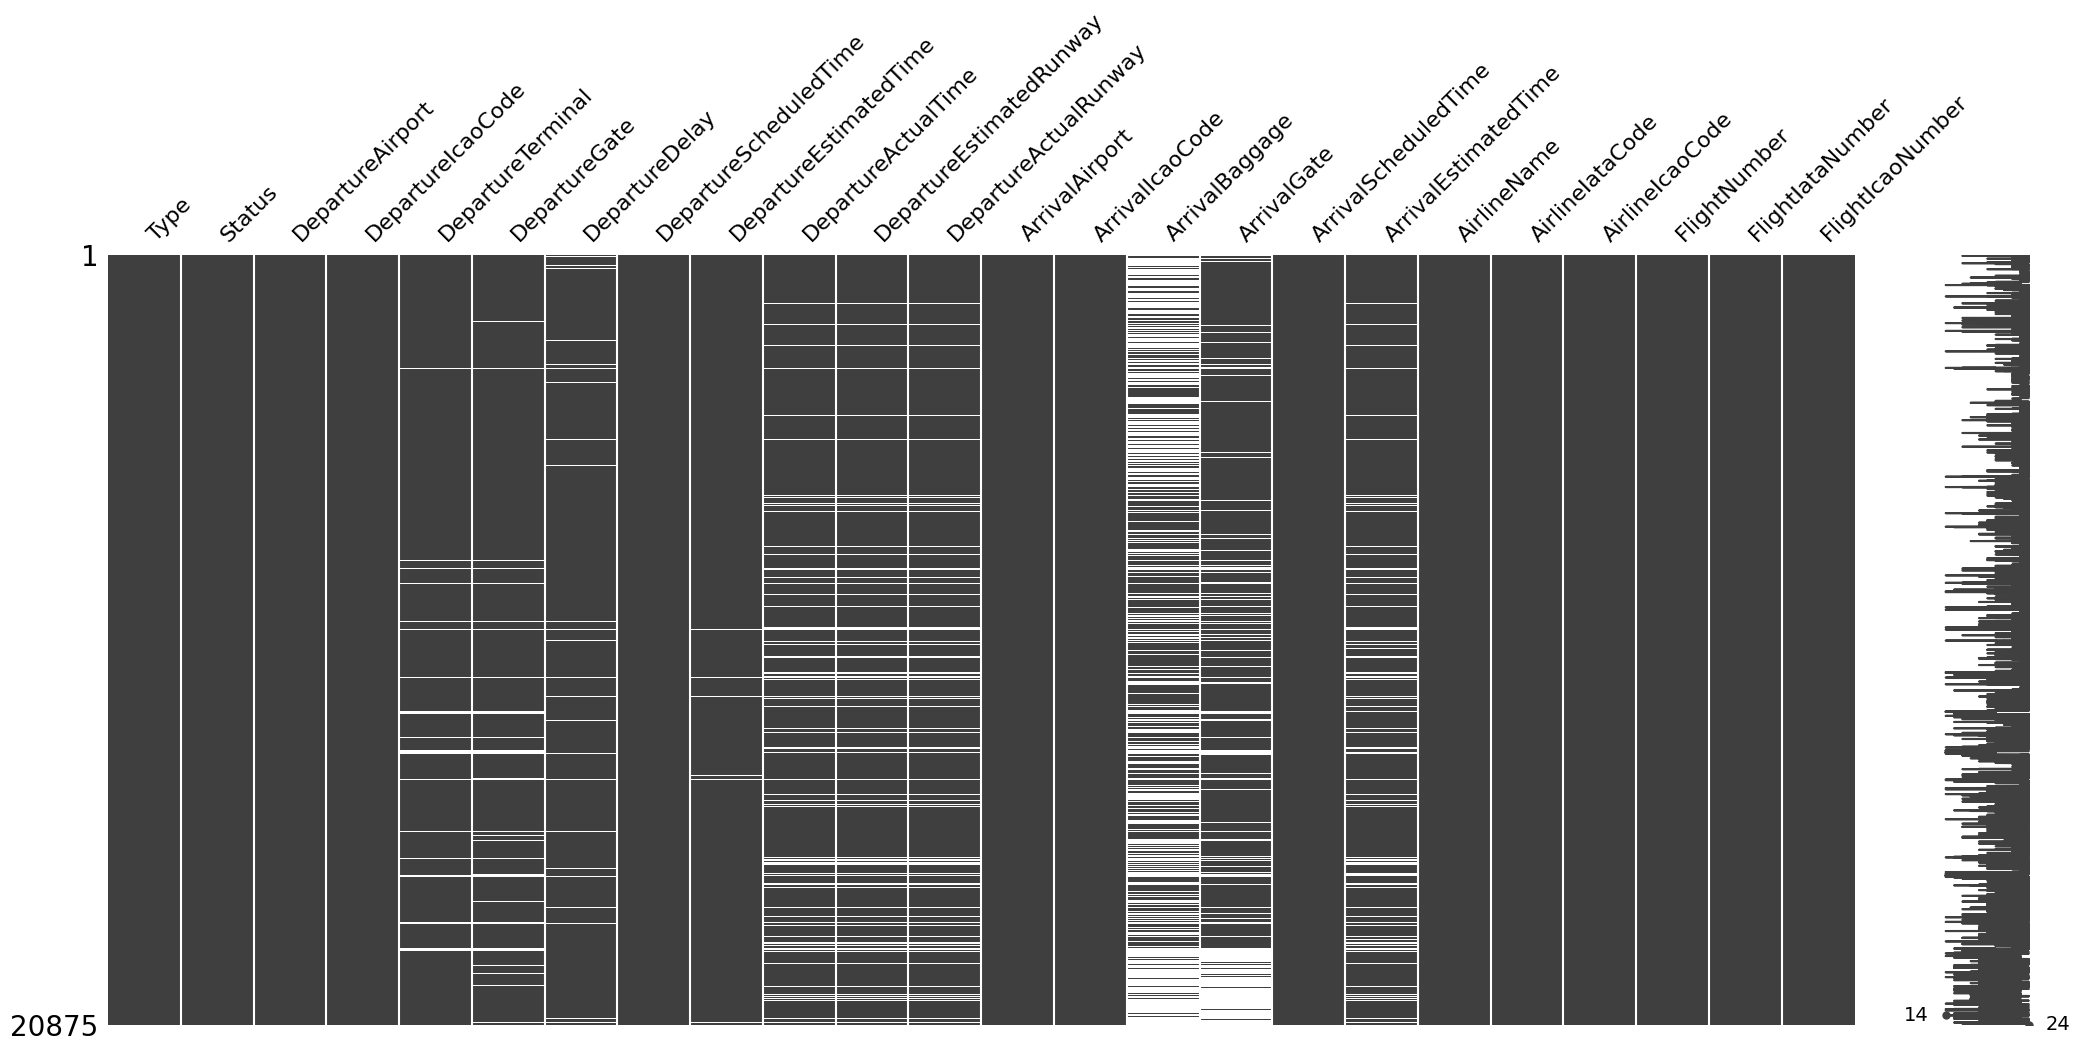

In [16]:
msno.matrix(df)

In [17]:
_, axs = plt.subplots(nrows=20, ncols=1, figsize=(12, 36))
for col, ax in zip(df.columns, axs.flatten()):
    no_float = df[col].value_counts()
    ax.bar(no_float.index, no_float, color='purple')
    ax.set_title(col)
plt.subplots_adjust(hspace=0.7)
plt.xticks(rotation='horizontal')
plt.suptitle('Feature Description')


Text(0.5, 0.98, 'Feature Description')

Error in callback <function _draw_all_if_interactive at 0x7cf8245c2050> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7cf8245c12d0> (for post_execute):


KeyboardInterrupt: ignored

<Axes: xlabel='DepartureDelay', ylabel='Count'>

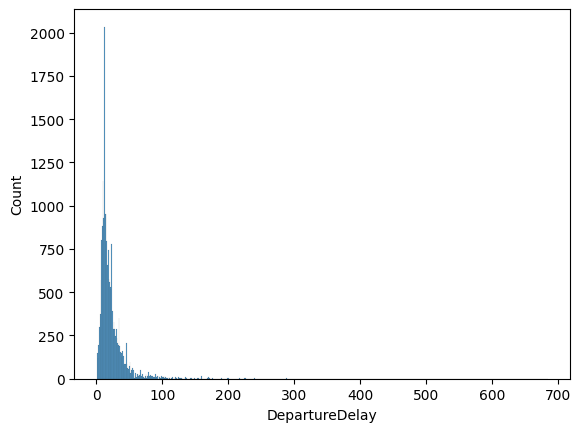

In [18]:
sns.histplot(df['DepartureDelay'])

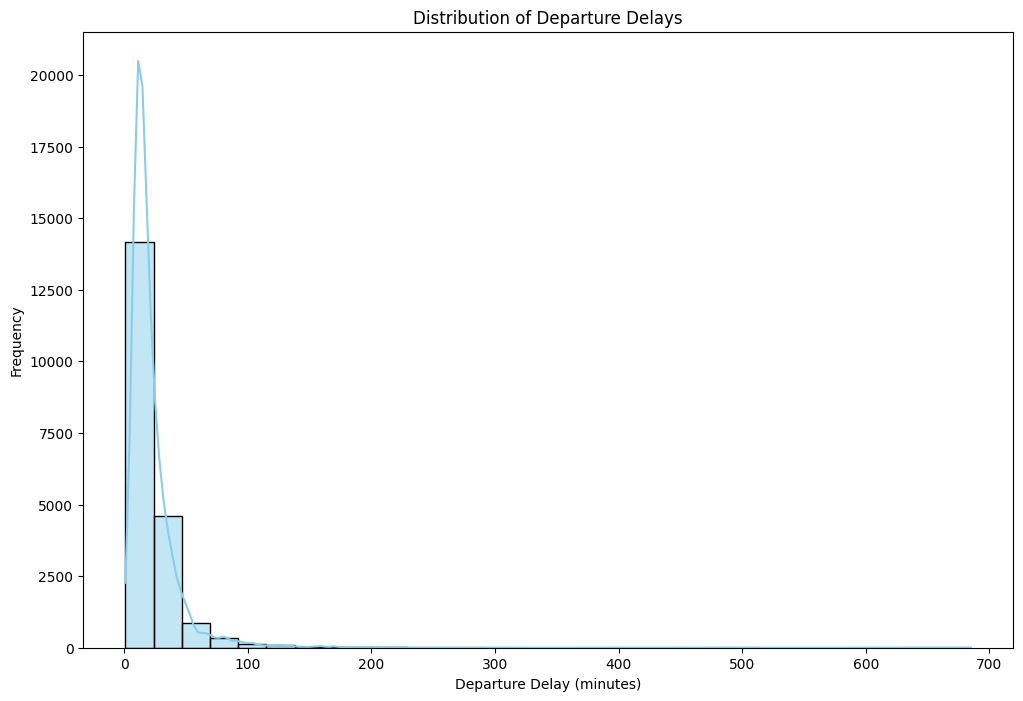

In [19]:
df_filtered = df.dropna(subset=['DepartureDelay'])

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Plot a histogram of departure delays
sns.histplot(df_filtered['DepartureDelay'], kde=True, bins=30, color='skyblue')

# Customize the plot
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

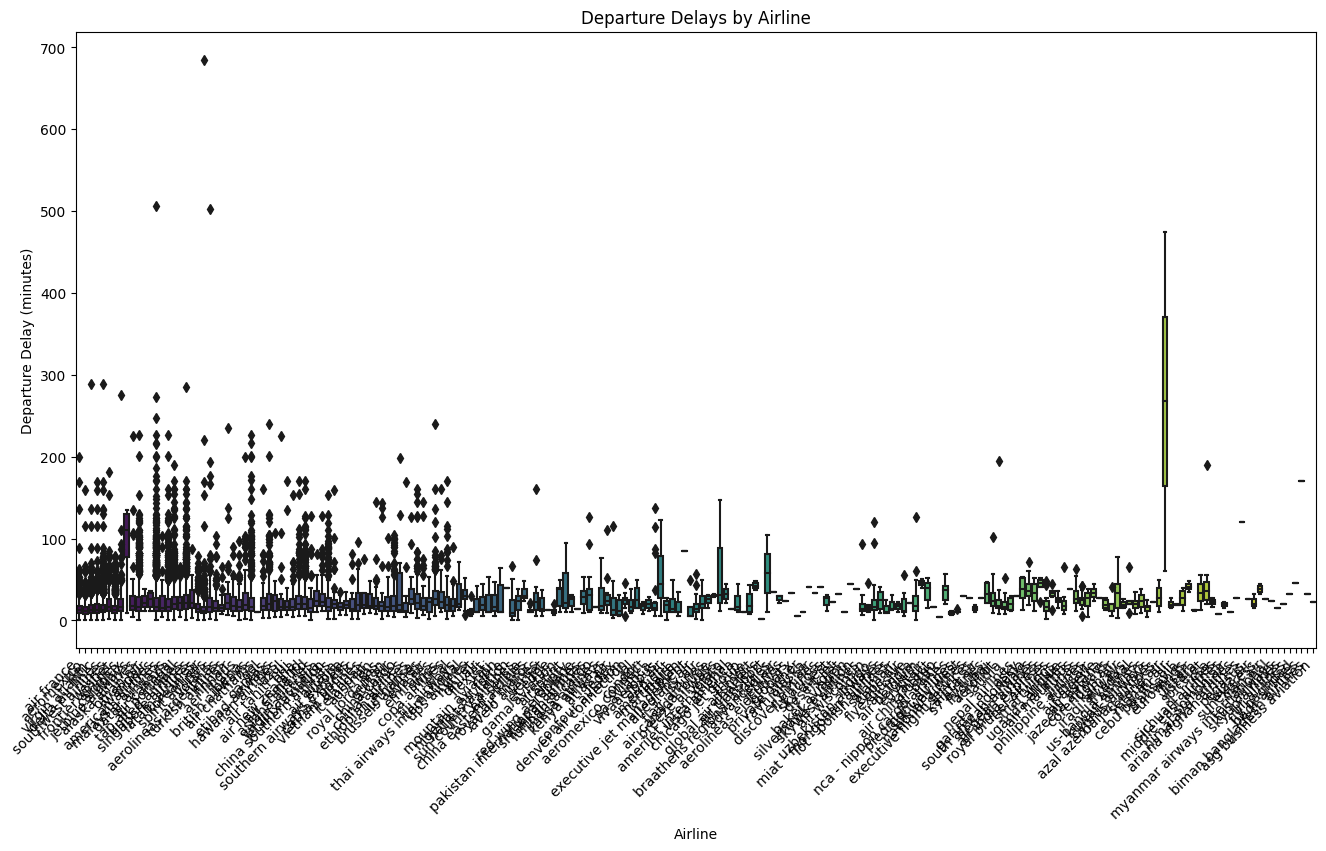

In [20]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='AirlineName', y='DepartureDelay', data=df_filtered, palette='viridis')
plt.title('Departure Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

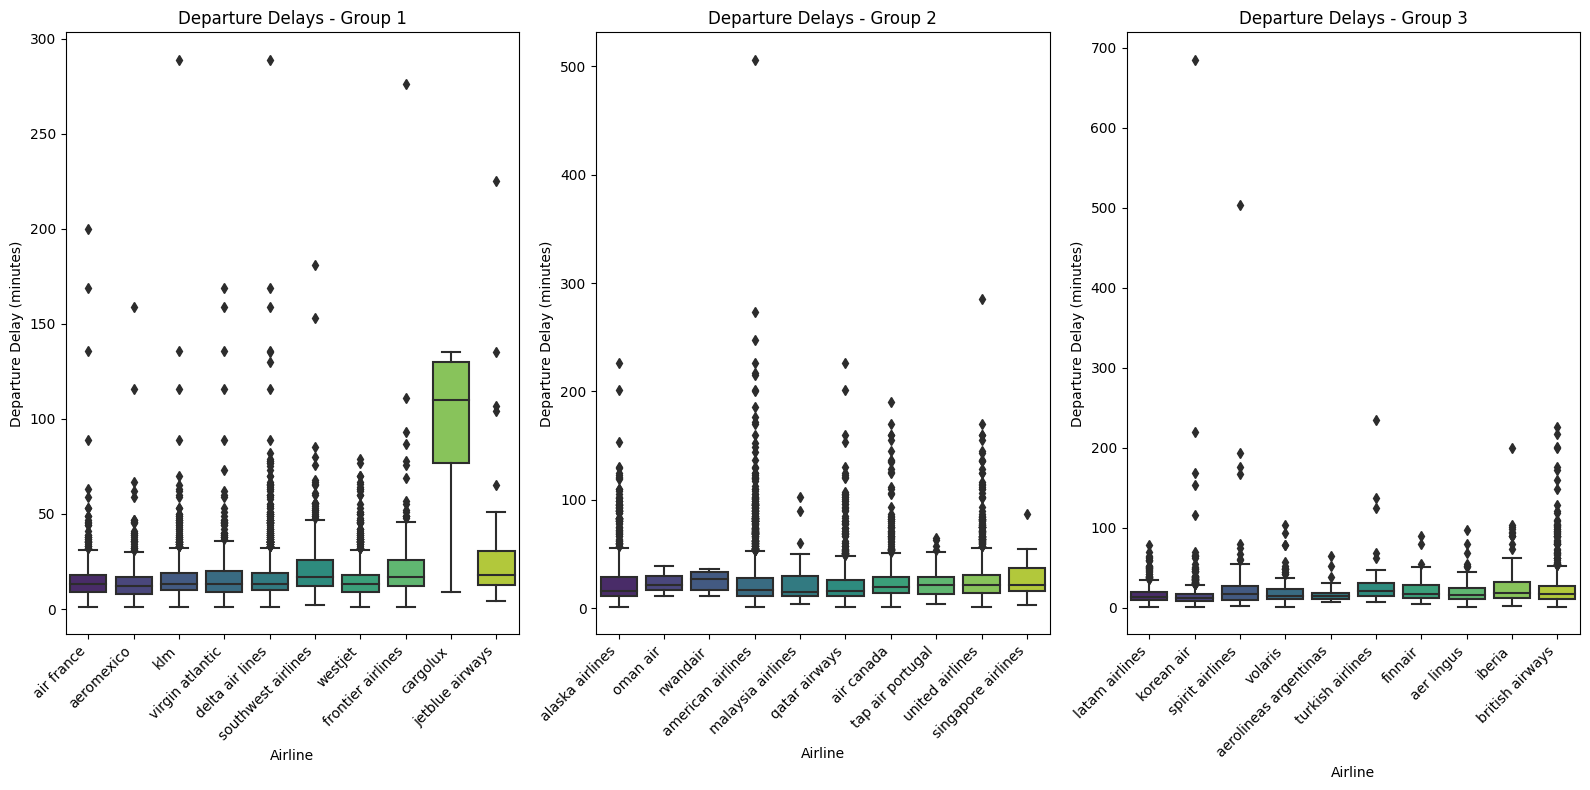

In [21]:
df_filtered_delays = df.dropna(subset=['DepartureDelay'])

# Set up the figure and axis for box plots
plt.figure(figsize=(16, 8))

# Define the number of groups and airlines per group
num_groups = 3  # You can adjust this number as needed
airlines_per_group = 10

# Calculate the total number of subplots
total_subplots = num_groups * airlines_per_group

for group in range(1, num_groups + 1):
    # Calculate the start and end indices for each group
    start_index = (group - 1) * airlines_per_group
    end_index = start_index + airlines_per_group

    # Extract a subset of airlines for the current group
    airlines_subset = df_filtered_delays['AirlineName'].unique()[start_index:end_index]

    # Create a subplot for the current group
    plt.subplot(1, num_groups, group)
    sns.boxplot(
        x='AirlineName',
        y='DepartureDelay',
        data=df_filtered_delays[df_filtered_delays['AirlineName'].isin(airlines_subset)],
        palette='viridis'
    )
    plt.title(f'Departure Delays - Group {group}')
    plt.xlabel('Airline')
    plt.ylabel('Departure Delay (minutes)')
    plt.xticks(rotation=45, ha='right')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [22]:
df['DepartureScheduledTime'] = pd.to_datetime(df['DepartureScheduledTime'])
df['DepartureActualTime'] = pd.to_datetime(df['DepartureActualTime'])

# Create a list to store the traces
traces = []

# Iterate over unique values in the 'AirlineName' column
for airline in df['AirlineName'].unique():
    # Filter DataFrame for the current airline
    airline_df = df[df['AirlineName'] == airline]

    # Create a trace for the current airline
    trace = go.Scatter(x=airline_df['DepartureScheduledTime'],
                       y=airline_df['DepartureDelay'],
                       mode='lines',
                       name=airline)

    # Append the trace to the list
    traces.append(trace)

# Create layout for the figure
layout = go.Layout(title='Departure Delays Over Time by Airlines',
                   xaxis=dict(title='Time'),
                   yaxis=dict(title='Departure Delay (minutes)'),
                   showlegend=True)

# Create the figure using the list of traces and layout
fig = go.Figure(data=traces, layout=layout)

# Update the layout for better readability
fig.update_layout(height=800, legend=dict(orientation="h", y=-0.2))

# Show the plot
fig.show()

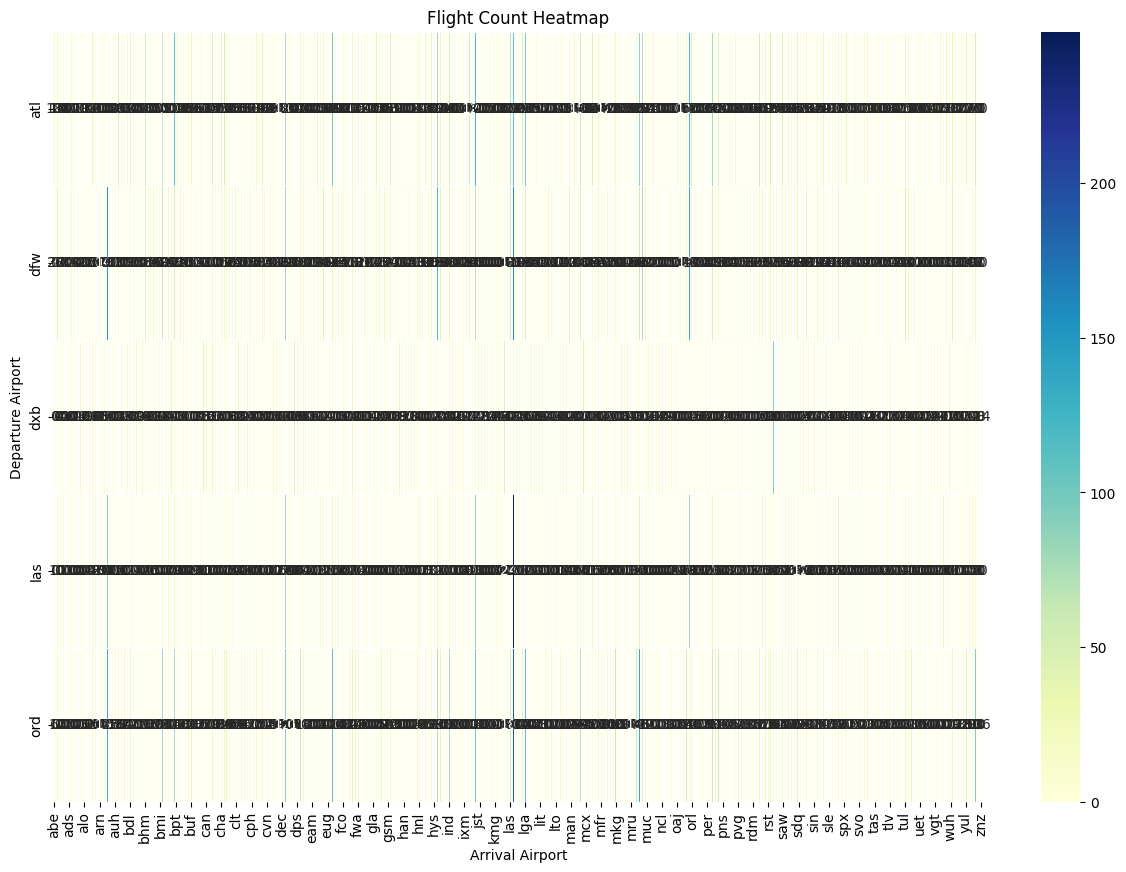

In [23]:
flight_count_pivot = df.pivot_table(index='DepartureAirport', columns='ArrivalAirport', aggfunc='size', fill_value=0)

# Set up the figure and axis
plt.figure(figsize=(15, 10))

# Create a heatmap
sns.heatmap(flight_count_pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)

# Customize the plot
plt.title('Flight Count Heatmap')
plt.xlabel('Arrival Airport')
plt.ylabel('Departure Airport')

# Show the plot
plt.show()

<Figure size 1000x800 with 0 Axes>

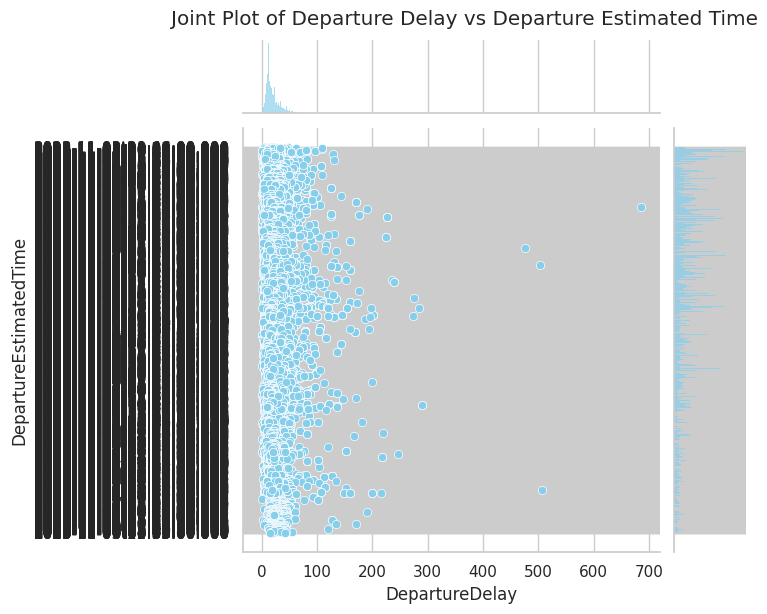

In [24]:
df_filtered = df.dropna(subset=['DepartureDelay', 'DepartureEstimatedTime'])

# Create a joint plot
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.jointplot(x='DepartureDelay', y='DepartureEstimatedTime', data=df_filtered, kind='scatter', color='skyblue')

plt.suptitle('Joint Plot of Departure Delay vs Departure Estimated Time', y=1.02)
plt.show()

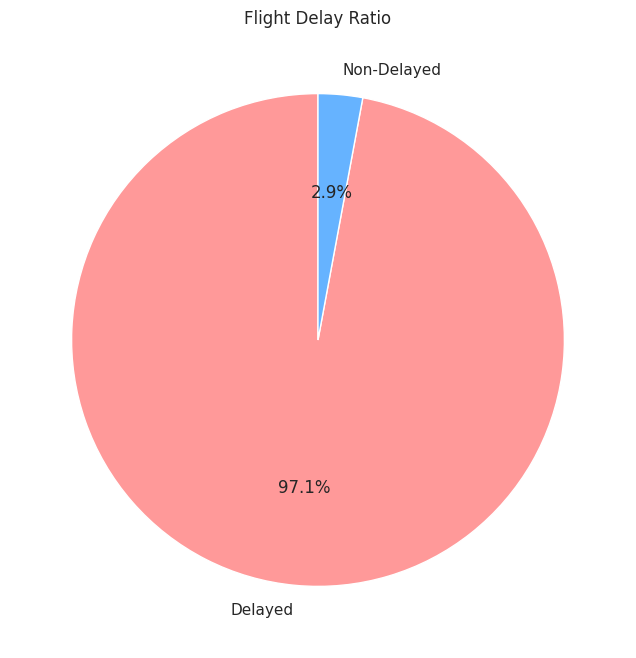

In [25]:
delayed_flights = df[df['DepartureDelay'].notnull()]
non_delayed_flights = df[df['DepartureDelay'].isnull()]

# Calculate the counts
delayed_count = len(delayed_flights)
non_delayed_count = len(non_delayed_flights)

# Data for the pie chart
labels = ['Delayed', 'Non-Delayed']
sizes = [delayed_count, non_delayed_count]
colors = ['#ff9999', '#66b3ff']  # Red for Delayed, Blue for Non-Delayed

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Flight Delay Ratio')
plt.show()

In [26]:
delayed_flights = df[df['DepartureDelay'].notnull()]
non_delayed_flights = df[df['DepartureDelay'].isnull()]

# Calculate the counts
delayed_count = len(delayed_flights)
non_delayed_count = len(non_delayed_flights)

# Create a pie chart using plotly
fig = px.pie(
    names=['Delayed', 'Non-Delayed'],
    values=[delayed_count, non_delayed_count],
    title='Flight Delay Ratio',
    color_discrete_sequence=['#ff9999', '#66b3ff'],  # Red for Delayed, Blue for Non-Delayed
)
fig.show()

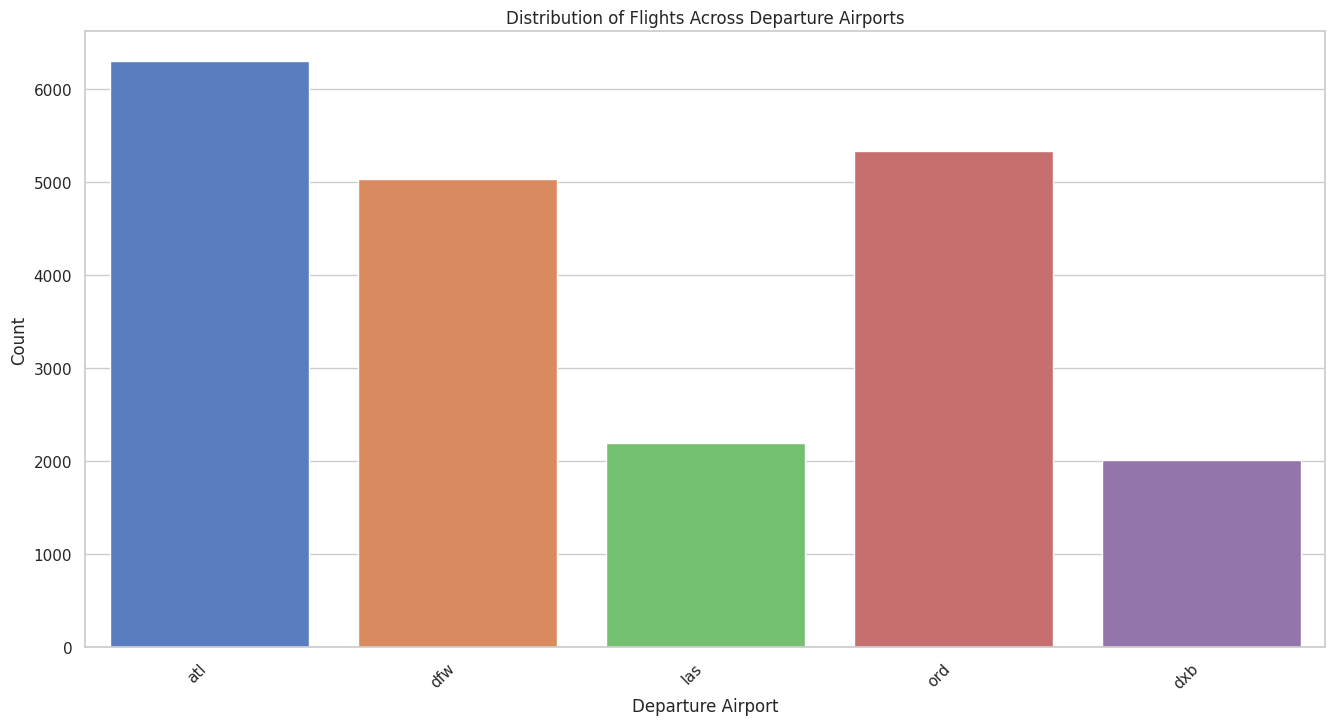

In [27]:
plt.figure(figsize=(16, 8))
sns.countplot(x='DepartureAirport', data=df, palette='muted')
plt.title('Distribution of Flights Across Departure Airports')
plt.xlabel('Departure Airport')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

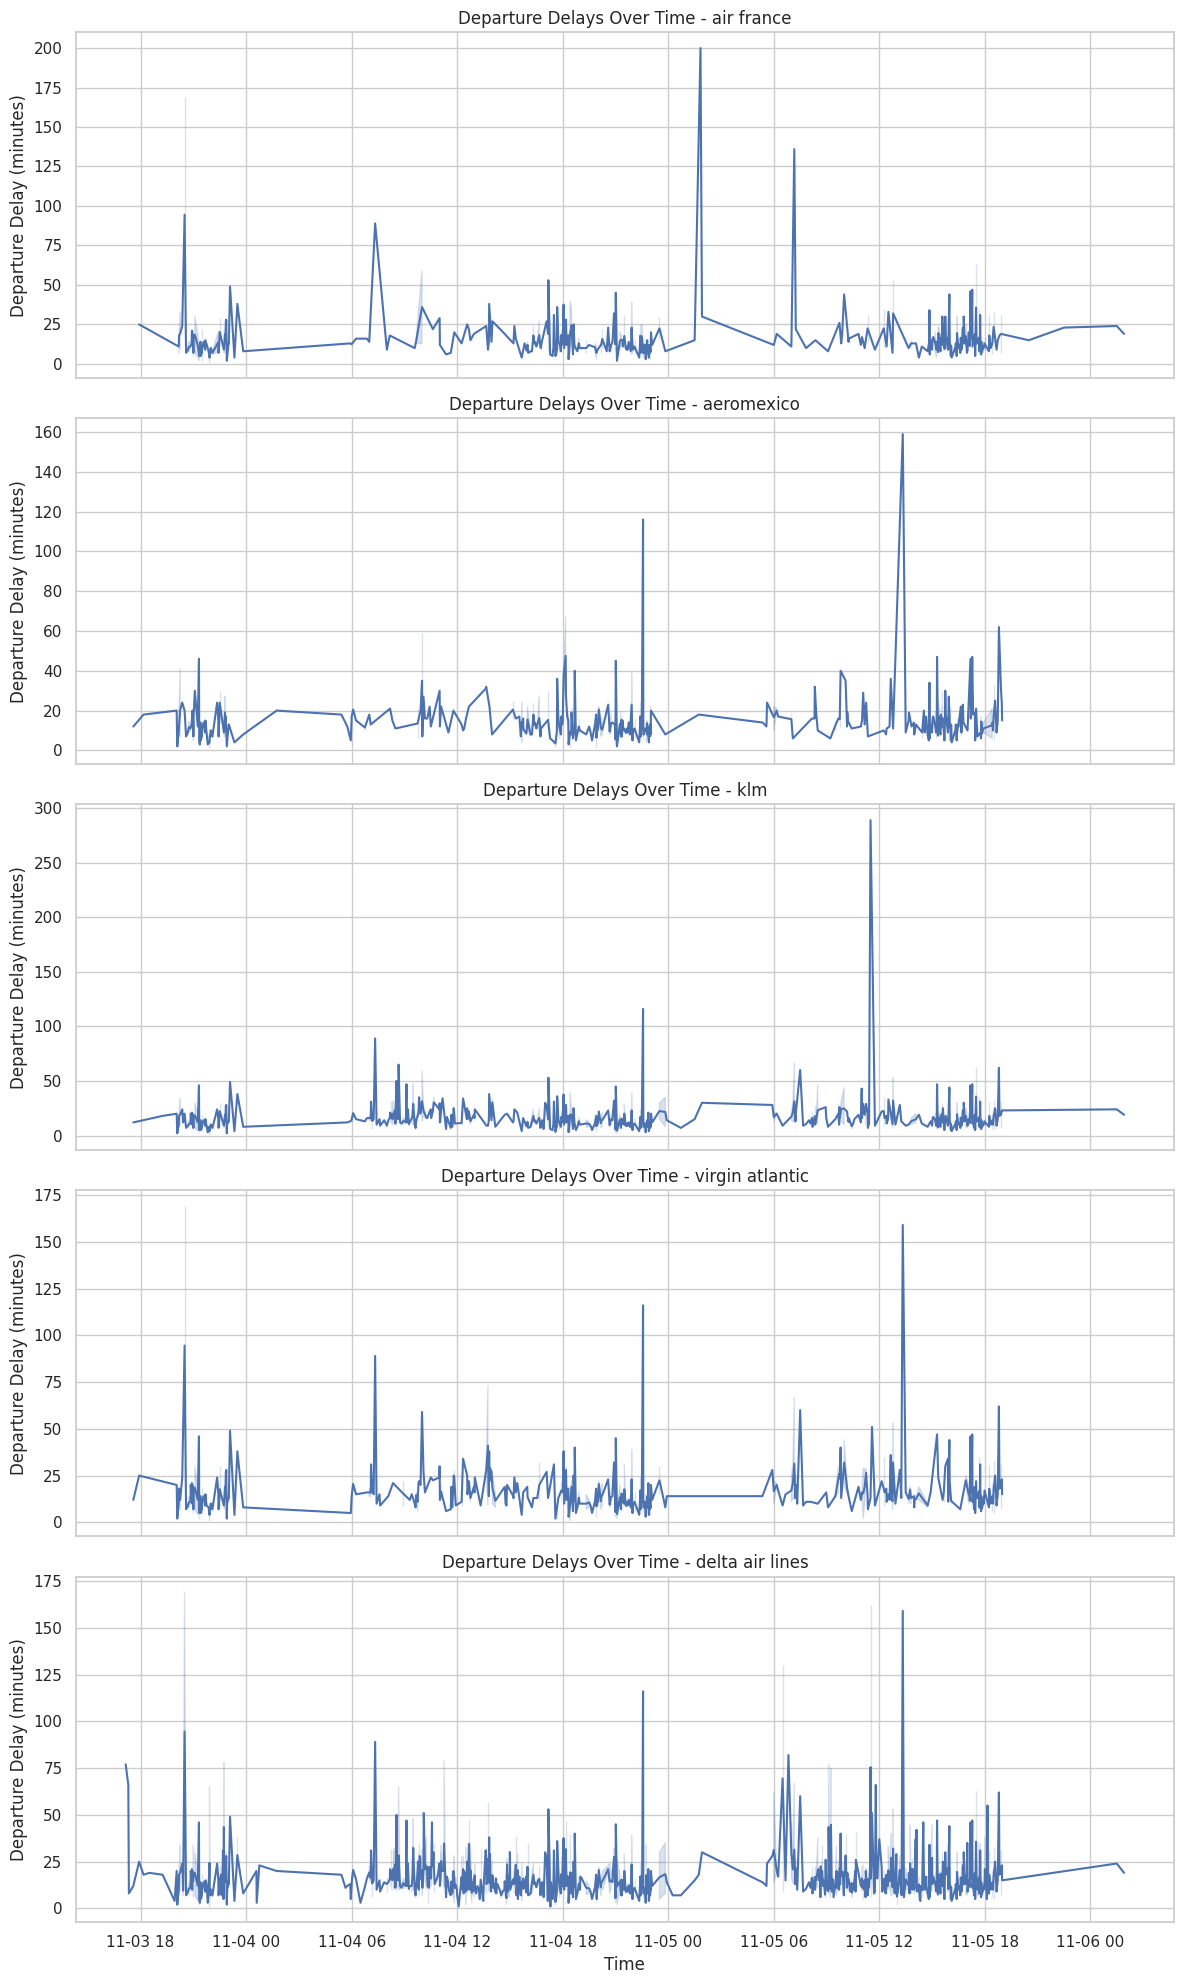

In [28]:
df['DepartureScheduledTime'] = pd.to_datetime(df['DepartureScheduledTime'])

# Choose categories for subplots (e.g., airlines or departure airports)
categories = df['AirlineName'].unique()[:5]  # Choose first 5 airlines for illustration

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(categories), figsize=(12, 4 * len(categories)), sharex=True)

# Iterate through categories and create time series subplots
for category, ax in zip(categories, axes):
    df_category = df[df['AirlineName'] == category]

    # Create time series plot for each category
    sns.lineplot(x='DepartureScheduledTime', y='DepartureDelay', data=df_category, ax=ax)

    ax.set_title(f'Departure Delays Over Time - {category}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Departure Delay (minutes)')

# Adjust the layout
plt.tight_layout()
plt.show()

In [29]:
# Convert 'DepartureScheduledTime' to datetime
df['DepartureScheduledTime'] = pd.to_datetime(df['DepartureScheduledTime'])
df['DepartureActualTime'] = pd.to_datetime(df['DepartureActualTime'])

# Filter out rows where 'DepartureDelay' is not null
delayed_flights = df[df['DepartureDelay'].notnull()]

# Create and display a single line chart for departure delays over time for all airports
fig = px.line(
    delayed_flights,
    x='DepartureScheduledTime',
    y='DepartureDelay',
    color='DepartureAirport',
    title='Departure Delays Over Time - All Airports',
    labels={'DepartureDelay': 'Delay (minutes)', 'DepartureScheduledTime': 'Scheduled Time'},
    line_shape='linear',
    markers=True,
)

# Show the interactive line chart with a legend
fig.show()

In [30]:
delayed_flights = df[df['DepartureDelay'].notnull()]

# Group data by airport and calculate delayed and non-delayed counts
airport_delay_counts = delayed_flights['DepartureAirport'].value_counts()

# Create a DataFrame from the value counts
df_airport_delay_counts = pd.DataFrame({'Airport': airport_delay_counts.index, 'DelayedCount': airport_delay_counts.values})

# Create a pie chart using plotly
fig = px.pie(
    df_airport_delay_counts,
    names='Airport',
    values='DelayedCount',
    title='Flight Delay Distribution by Airport',
    color='Airport',
)
fig.show()

In [31]:
delayed_flights = df[df['DepartureDelay'].notnull()]

# Get the unique airports in the dataset
airports = delayed_flights['DepartureAirport'].unique()

# Create a separate pie chart for each airport
for airport in airports:
    # Filter data for the current airport
    airport_data = delayed_flights[delayed_flights['DepartureAirport'] == airport]

    # Calculate delayed and non-delayed counts
    delayed_count = len(airport_data)
    non_delayed_count = len(df) - delayed_count

    # Create a pie chart for the current airport
    fig = px.pie(
        names=['Delayed', 'Non-Delayed'],
        values=[delayed_count, non_delayed_count],
        title=f'Flight Delay Distribution - {airport}',
        color_discrete_sequence=['#ff9999', '#66b3ff'],  # Red for Delayed, Blue for Non-Delayed
    )

    # Show the pie chart
    fig.show()

In [32]:
df['DepartureScheduledTime'] = pd.to_datetime(df['DepartureScheduledTime'])

# Choose categories for subplots (e.g., airlines or departure airports)
categories = df['AirlineName'].unique()[:5]  # Choose first 5 airlines for illustration

# Create a separate line plot for each category (airline or departure airport)
for category in categories:
    df_category = df[df['AirlineName'] == category]

    # Create a line plot for the current category
    fig = px.line(
        df_category,
        x='DepartureScheduledTime',
        y='DepartureDelay',
        title=f'Departure Delays Over Time - {category}',
        labels={'DepartureScheduledTime': 'Time', 'DepartureDelay': 'Departure Delay (minutes)'}
    )

    # Show the line plot
    fig.show()

In [33]:
df['DepartureScheduledTime'] = pd.to_datetime(df['DepartureScheduledTime'])
df['DepartureActualTime'] = pd.to_datetime(df['DepartureActualTime'])

# Choose three airports for illustration
airports = df['DepartureAirport'].unique()[:5]

# Create subplots
fig = make_subplots(rows=len(airports), cols=1, shared_xaxes=True, subplot_titles=airports)

# Iterate over the chosen airports
for i, airport in enumerate(airports, start=1):
    # Filter DataFrame for the current airport
    airport_df = df[df['DepartureAirport'] == airport]

    # Add trace for the current airport to the subplot
    fig.add_trace(
        go.Scatter(
            x=airport_df['DepartureScheduledTime'],
            y=airport_df['DepartureDelay'],
            mode='lines',
            name=airport
        ),
        row=i, col=1
    )

# Update layout for the figure
fig.update_layout(
    title='Departure Delays Over Time by Airports',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Departure Delay (minutes)'),
    showlegend=False  # Each subplot will have its own legend
)

# Show the plot
fig.show()

In [34]:
df['DepartureScheduledTime'] = pd.to_datetime(df['DepartureScheduledTime'])
df['DepartureActualTime'] = pd.to_datetime(df['DepartureActualTime'])

# Create a list to store the traces
traces = []

# Choose three airlines for illustration
airlines = df['AirlineName'].unique()[:230]

# Iterate over the chosen airlines
for airline in airlines:
    # Filter DataFrame for the current airline
    airline_df = df[df['AirlineName'] == airline]

    # Create a trace for the current airline
    trace = go.Scatter(x=airline_df['DepartureScheduledTime'],
                      y=airline_df['DepartureDelay'],
                      mode='lines',
                      name=airline)

    # Append the trace to the list
    traces.append(trace)

# Create layout for the figure
layout = go.Layout(title='Departure Delays Over Time by Airlines',
                   xaxis=dict(title='Time'),
                   yaxis=dict(title='Departure Delay (minutes)'),
                   showlegend=True)

# Create the figure using the list of traces and layout
fig = go.Figure(data=traces, layout=layout)

# Update the layout for better readability
fig.update_layout(height=800, legend=dict(orientation="h", y=-0.2))

# Show the plot
fig.show()

In [35]:
# Filter out rows with non-null departure delay
delayed_flights = df[df['DepartureDelay'].notnull()]

# Create a scatter plot using Plotly
fig = px.scatter(
    delayed_flights,
    x='DepartureAirport',
    y='DepartureDelay',
    title='Departure Delay for Individual Airports',
    labels={'DepartureAirport': 'Airport', 'DepartureDelay': 'Departure Delay (minutes)'},
    color='DepartureAirport',  # Color points by airport for better differentiation
    size='DepartureDelay',     # Size points by departure delay for emphasis
    hover_data=['AirlineName']  # Display airline name in hover information
)

# Customize the layout
fig.update_layout(
    xaxis_title='Airport',
    yaxis_title='Departure Delay (minutes)',
    showlegend=False  # Disable legend for better clarity
)

# Show the scatter plot
fig.show()

In [37]:
selected_airports = ['atl', 'dxb', 'dfw', 'las', 'ord']

# Filter out rows with non-null departure delay for the selected airports
delayed_flights_selected = df[df['DepartureDelay'].notnull() & df['DepartureAirport'].isin(selected_airports)]

# Create separate scatter plots for each selected airport
for airport in selected_airports:
    airport_data = delayed_flights_selected[delayed_flights_selected['DepartureAirport'] == airport]

    # Create a scatter plot for the current airport
    fig = px.scatter(
        airport_data,
        x='DepartureAirport',
        y='DepartureDelay',
        title=f'Departure Delay - {airport}',
        labels={'DepartureAirport': 'Airport', 'DepartureDelay': 'Departure Delay (minutes)'},
        size='DepartureDelay',
        hover_data=['AirlineName']
    )

    # Customize the layout
    fig.update_layout(
        xaxis_title='Airport',
        yaxis_title='Departure Delay (minutes)',
        showlegend=False  # Disable legend for better clarity
    )

    # Show the scatter plot for the current airport
    fig.show()

In [38]:
delayed_flights = df[df['DepartureDelay'].notnull()]

# Get the unique airports in the dataset
airports = delayed_flights['DepartureAirport'].unique()

# Create and display an interactive pie chart for each airport
for airport in airports:
    # Filter data for the current airport
    airport_data = delayed_flights[delayed_flights['DepartureAirport'] == airport]

    # Calculate delayed and non-delayed counts
    delayed_count = len(airport_data)
    non_delayed_count = len(df) - delayed_count

    # Create a pie chart for the current airport
    fig = go.Figure(data=[go.Pie(
        labels=['Delayed', 'Non-Delayed'],
        values=[delayed_count, non_delayed_count],
        hoverinfo='label+percent+value',
        title=f'Flight Delay Distribution - {airport}',
        marker=dict(colors=['#ff9999', '#66b3ff'], line=dict(color='#000000', width=2)),
    )])

    # Show the interactive pie chart
    fig.show()

In [39]:
df['DepartureScheduledTime'] = pd.to_datetime(df['DepartureScheduledTime'])
df['DepartureActualTime'] = pd.to_datetime(df['DepartureActualTime'])

# Choose three airports for illustration
airports = df['DepartureAirport'].unique()[:5]

# Create subplots
fig = make_subplots(rows=len(airports), cols=1, shared_xaxes=True, subplot_titles=airports)

# Iterate over the chosen airports
for i, airport in enumerate(airports, start=1):
    # Filter DataFrame for the current airport
    airport_df = df[df['DepartureAirport'] == airport]

    # Add trace for the current airport to the subplot
    fig.add_trace(
        go.Scatter(
            x=airport_df['DepartureScheduledTime'],
            y=airport_df['DepartureDelay'],
            mode='lines',
            name=airport
        ),
        row=i, col=1
    )

# Update layout for the figure
fig.update_layout(
    title='Departure Delays Over Time by Airports',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Departure Delay (minutes)'),
    showlegend=False  # Each subplot will have its own legend
)

# Show the plot
fig.show()